In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.physics.control.lti import *
from sympy.physics.control import *
import control as ct

In [4]:
s, t = symbols('s t')
m1, m2, k2, b2, b3, k1, b1 = symbols('m1 m2 k2 b2 b3 k1 b1', real = True)
Y1 = Function("Y1")(s)
Y2 = Function("Y2")(s)
U = Function("U")(s)

In [5]:
eq1 = Eq(Y1*(m1*s**2 + k1) - Y2*k1, 0)
eq2 = Eq(Y2*(m2*s**2 + b1*s + k1) - Y1*k1, b1*s*U)
solve = linsolve([eq1, eq2], Y1,Y2).args[0]

In [6]:
# solve_ = solve.args[0]
tf1 = solve[0]
tf2 = solve[1]

tf1 = tf1/U
G1 = tf1.simplify()

tf2 = tf2/U
G2 = tf2.simplify()

In [7]:
G1

b1*k1/(b1*k1 + b1*m1*s**2 + k1*m1*s + k1*m2*s + m1*m2*s**3)

In [8]:
print(G1)

b1*k1/(b1*k1 + b1*m1*s**2 + k1*m1*s + k1*m2*s + m1*m2*s**3)


In [9]:
G2

b1*(k1 + m1*s**2)/(b1*k1 + b1*m1*s**2 + k1*m1*s + k1*m2*s + m1*m2*s**3)

In [10]:
print(G2)

b1*(k1 + m1*s**2)/(b1*k1 + b1*m1*s**2 + k1*m1*s + k1*m2*s + m1*m2*s**3)


In [13]:
bs = [1800, 1250, 1500]
ks = [23000, 23000, 17000]

In [28]:
G1_tf = []
G2_tf = []
for i in range(3):
    
    m_1 = 250
    m_2 = 30
    b_1 = bs[i]
    k_1 = ks[i]
    
    G1_num = G1.subs([
        (m1,m_1),
        (m2,m_2),
        (b1,b_1),
        (k1,k_1),
    ]).expand().simplify()

    G2_num = G2.subs([
        (m1,m_1),
        (m2,m_2),
        (b1,b_1),
        (k1,k_1),
    ]).expand().simplify()

    G1_tf.append(ct.tf([b_1*k_1],[m_1*m_2, b_1*m_1, k_1*m_1 + k_1*m_2, k_1*b_1]))
    G2_tf.append(ct.tf([b_1*m_1, 0, b_1*k_1],[m_1*m_2, b_1*m_1, k_1*m_1 + k_1*m_2, k_1*b_1]))

In [29]:
G1_tf[1]

TransferFunction(array([28750000]), array([    7500,   312500,  6440000, 28750000]))

In [17]:
from scipy import signal

cpr = 50

cpr2 = 200
t1 = []
t3 = []

t = np.linspace(0,10,1000)
u = np.heaviside(t,t)
for idx in range(len(u)):
  if(idx<cpr):
    t1.append(u[idx])
  else:
    t1.append(0)

for idx in range(len(u)):
  if(idx<cpr2):
    t3.append(u[idx])
  else:
    t3.append(0)


Text(0.5, 1.0, 'arbitrary input 1')

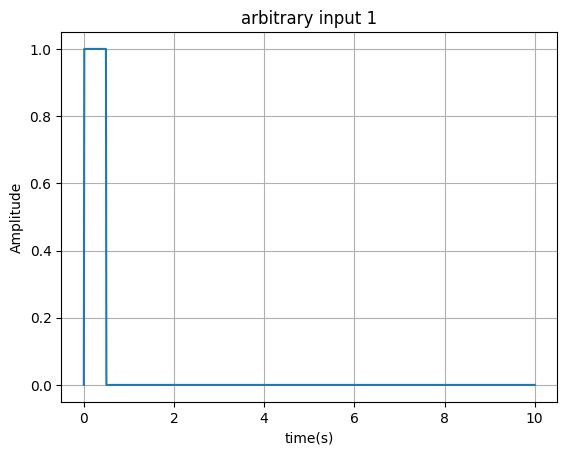

In [18]:
plt.plot(t,t1)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.title('arbitrary input 1')

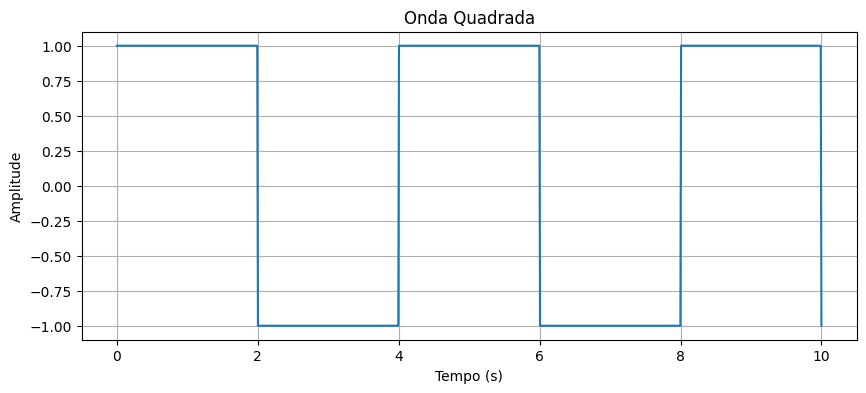

In [19]:
def square_wave(t, amplitude, frequency, duty_cycle):
    # Calcula o valor da onda quadrada para cada instante de tempo em t
    period = 1 / frequency
    t_mod = t % period
    wave = np.where(t_mod < period * duty_cycle, amplitude, -amplitude)
    return wave

# Configurações da onda quadrada
amplitude = 1.0  # Amplitude da onda
frequency = 0.25  # Frequência da onda (em Hz)
duty_cycle = 0.5  # Ciclo de trabalho (50%)

# Valores de tempo para o gráfico
t = np.linspace(0, 10, num=1000)  # Intervalo de tempo de 0 a 5 segundos

# Calcula a onda quadrada
wave = square_wave(t, amplitude, frequency, duty_cycle)

# Plota a onda quadrada
plt.figure(figsize=(10, 4))
plt.plot(t, wave)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Onda Quadrada')
plt.grid()
plt.show()

Text(0.5, 1.0, 'arbitrary input 2')

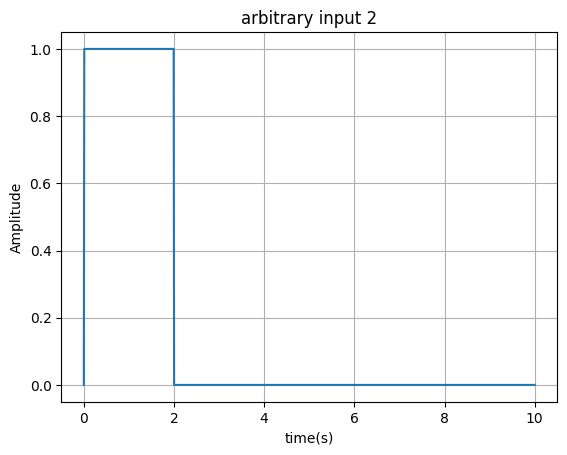

In [20]:
plt.plot(t,t3)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.title('arbitrary input 2')

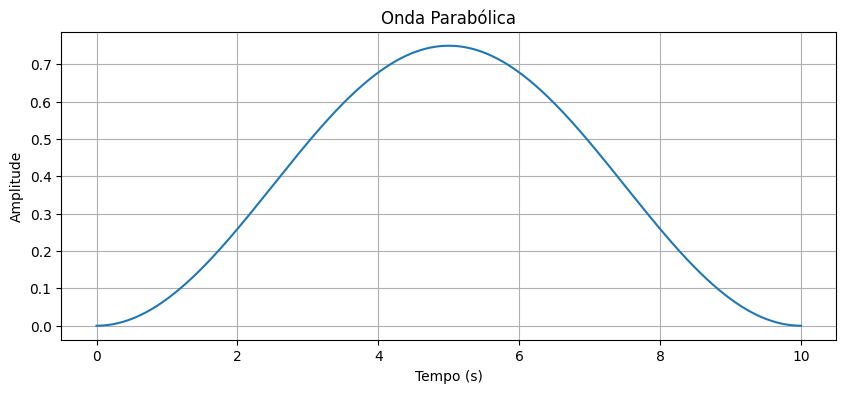

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def parabolic_wave(t, amplitude, frequency):
    # Calcula o valor da onda parabólica para cada instante de tempo em t
    wave = amplitude * np.sin(2 * np.pi * frequency * t) ** 2
    return wave

# Configurações da onda parabólica
amplitude = 0.75  # Amplitude da onda
frequency = 0.05  # Frequência da onda (em Hz)

# Valores de tempo para o gráfico
t = np.linspace(0, 10, num=1000)  # Intervalo de tempo de 0 a 10 segundos

# Calcula a onda parabólica
wave_p = parabolic_wave(t, amplitude, frequency)

# Plota a onda parabólica
plt.figure(figsize=(10, 4))
plt.plot(t, wave_p)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Onda Parabólica')
plt.grid()
plt.show()


In [22]:
# Definir a função que calcula a derivada temporal do sistema
def dxdt(x, t):
    # O sistema é uma senoide e seu cosseno negativo
    dx = x[1]
    dy = -np.sin(x[0])
    return [dx, dy]

# Definir valores iniciais para X0
X0 = [[0, 1], [0, -1], [np.pi/2, 1], [np.pi, -1]]

# Definir o tempo máximo de simulação
Tmax = 10

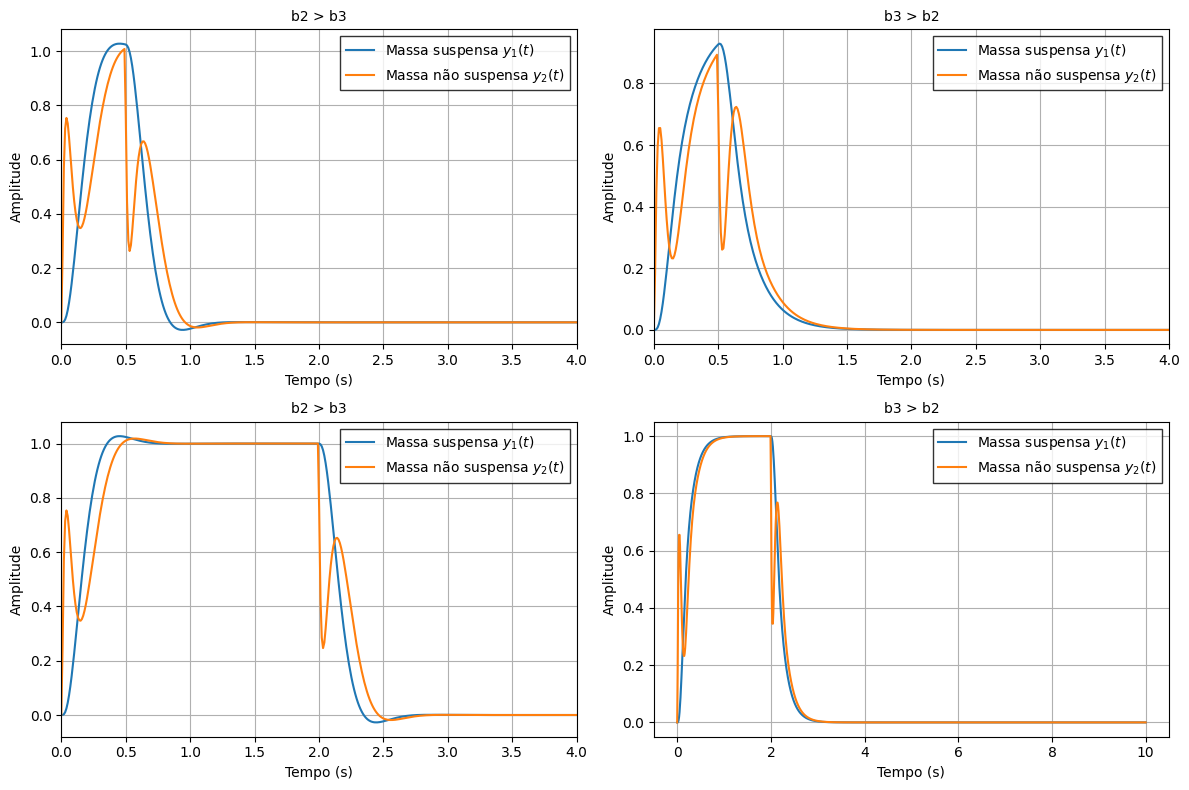

In [30]:
#Single Axes in on Figure

fig, axes = plt.subplots(2,2,figsize=(12,8))
# fig.text(1.0,1.0, fontsize=10 )

fontsize = 10

ax = axes[0][0]
tx1, y1 = ct.forced_response(G1_tf[0], T=t, U=t1)
tx2, y2 = ct.forced_response(G2_tf[0], T=t, U=t1)

ax.plot(tx1,y1, label='Massa suspensa {}'.format(r'$y_1(t)$'))
ax.plot(tx2, y2, label='Massa não suspensa {}'.format(r'$y_2(t)$'))
ax.set_xlabel('Tempo (s)', fontsize=fontsize)
ax.set_ylabel('Amplitude', fontsize=fontsize )

ax.legend(loc='upper right',fancybox=False,edgecolor='black',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid()
ax.set_xlim(0,4)
ax.set_title('b2 > b3', fontsize=10)


ax = axes[0][1]
tx1, y1 = ct.forced_response(G1_tf[1], T=t, U=t1)
tx2, y2 = ct.forced_response(G2_tf[1], T=t, U=t1)

ax.plot(tx1,y1, label='Massa suspensa {}'.format(r'$y_1(t)$'))
ax.plot(tx2, y2, label='Massa não suspensa {}'.format(r'$y_2(t)$'))
ax.set_xlabel('Tempo (s)', fontsize=fontsize)
ax.set_ylabel('Amplitude',  fontsize=fontsize)
ax.legend(loc='upper right',fancybox=False,edgecolor='black',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid()
ax.set_xlim(0,4)
ax.set_title('b3 > b2', fontsize=10)


ax = axes[1][0]
tx1, y1 = ct.forced_response(G1_tf[0], T=t, U=t3)
tx2, y2 = ct.forced_response(G2_tf[0], T=t, U=t3)

ax.plot(tx1,y1, label='Massa suspensa {}'.format(r'$y_1(t)$'))
ax.plot(tx2, y2, label='Massa não suspensa {}'.format(r'$y_2(t)$'))
ax.set_xlabel('Tempo (s)', fontsize=fontsize)
ax.set_ylabel('Amplitude',  fontsize=fontsize)
ax.legend(loc='upper right',fancybox=False,edgecolor='black',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid()
ax.set_xlim(0,4)
ax.set_title('b2 > b3', fontsize=10)


ax = axes[1][1]
tx1, y1 = ct.forced_response(G1_tf[1], T=t, U=t3)
tx2, y2 = ct.forced_response(G2_tf[1], T=t, U=t3)

ax.plot(tx1,y1, label='Massa suspensa {}'.format(r'$y_1(t)$'))
ax.plot(tx2, y2, label='Massa não suspensa {}'.format(r'$y_2(t)$'))
ax.set_xlabel('Tempo (s)', fontsize=fontsize)
ax.set_ylabel('Amplitude',  fontsize=fontsize)
ax.legend(loc='upper right',fancybox=False,edgecolor='black',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid()
ax.set_title('b3 > b2', fontsize=10)


# fig.text(0.5,-0.04,'Efeito da variação dos valores das constantes de amortecimento b2 e b3',ha='center',fontsize=20)


plt.tight_layout()
plt.show()

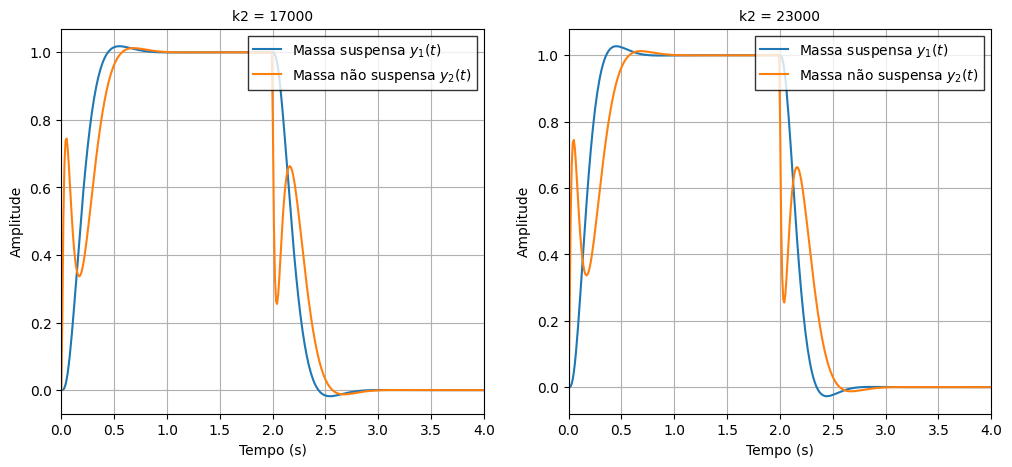

In [32]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
# fig.text(1.0,1.0, fontsize=10 )

fontsize = 10
# fig.text(0.5,-0.04,'Efeito da variação do valor da constante elástica k2',ha='center',fontsize=20)

ax = axes[0]
tx1, y1 = ct.forced_response(G1_tf[2], T=t, U=t3)
tx2, y2 = ct.forced_response(G2_tf[2], T=t, U=t3)

ax.plot(tx1,y1, label='Massa suspensa {}'.format(r'$y_1(t)$'))
ax.plot(tx2, y2, label='Massa não suspensa {}'.format(r'$y_2(t)$'))
ax.set_xlabel('Tempo (s)', fontsize=fontsize)
ax.set_ylabel('Amplitude',  fontsize=fontsize)
ax.legend(loc='upper right',fancybox=False,edgecolor='black',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid()
ax.set_title('k2 = 17000', fontsize=10)
ax.set_xlim(0,4)

ax = axes[1]
tx1, y1 = ct.forced_response(G1_tf[0], T=t, U=t3)
tx2, y2 = ct.forced_response(G2_tf[2], T=t, U=t3)
ax.plot(tx1,y1, label='Massa suspensa {}'.format(r'$y_1(t)$'))
ax.plot(tx2, y2, label='Massa não suspensa {}'.format(r'$y_2(t)$'))
ax.set_xlabel('Tempo (s)', fontsize=fontsize)
ax.set_ylabel('Amplitude',  fontsize=fontsize)
ax.legend(loc='upper right',fancybox=False,edgecolor='black',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid()
ax.set_title('k2 = 23000', fontsize=10)
ax.set_xlim(0,4)

plt.show()

In [25]:
impulse = np.zeros_like(t)
impulse[len(t)//2] = 1

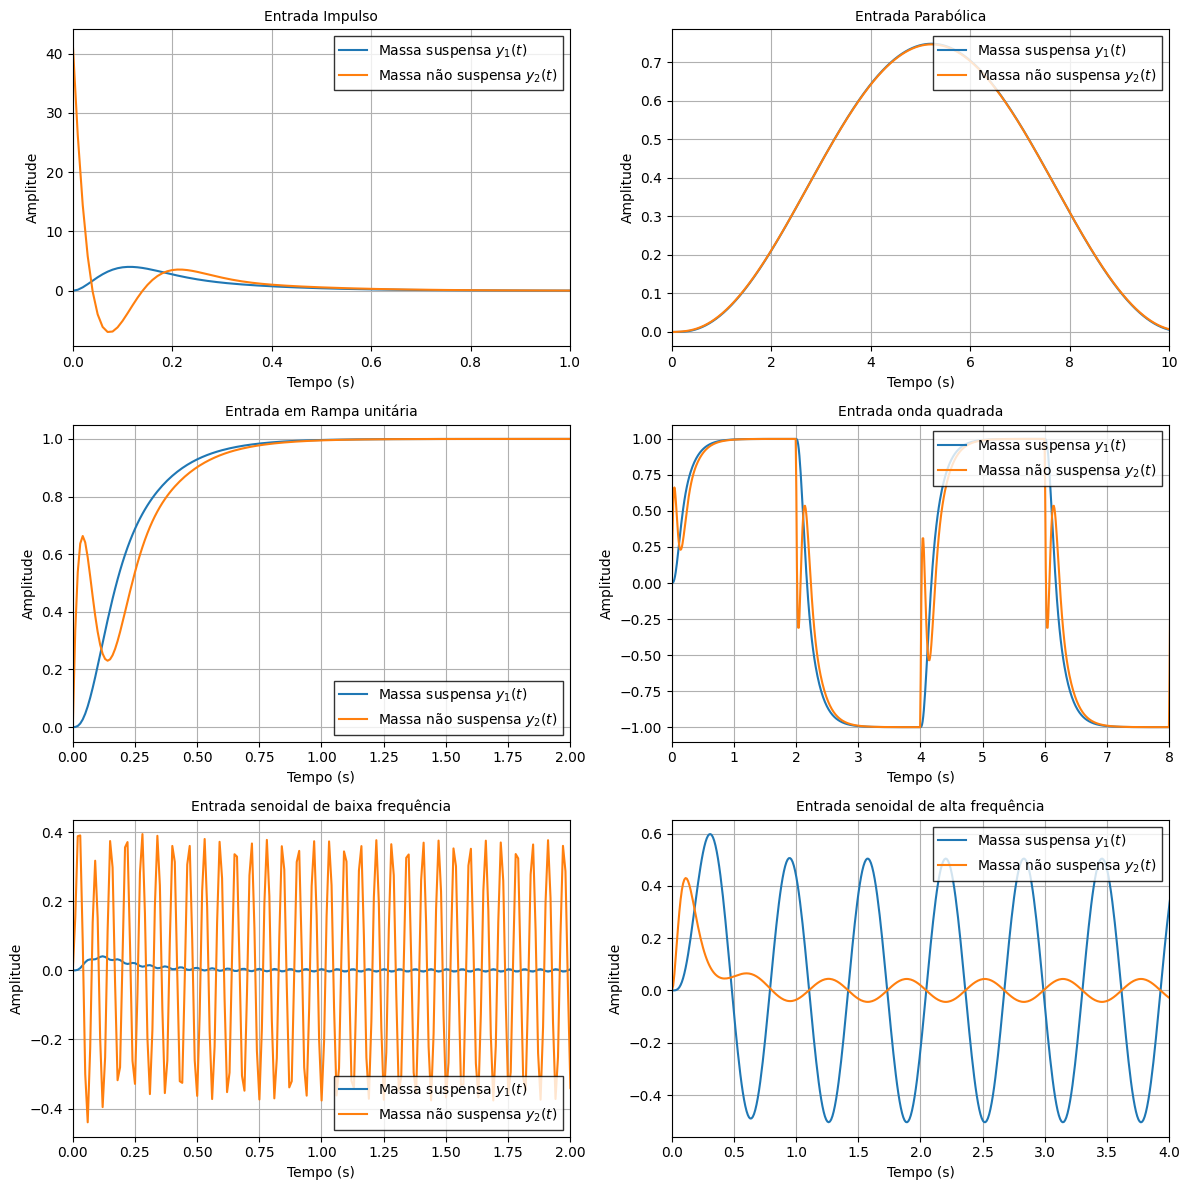

In [45]:
#Single Axes in on Figure

fig, axes = plt.subplots(3,2,figsize=(12,12))
# fig.text(1.0,1.0, fontsize=10 )

fontsize = 10

ax = axes[0][0]
tx1, y1 = ct.impulse_response(G1_tf[1], T=t)
tx2, y2 = ct.impulse_response(G2_tf[1], T=t)

ax.plot(tx1,y1, label='Massa suspensa {}'.format(r'$y_1(t)$'))
ax.plot(tx2, y2, label='Massa não suspensa {}'.format(r'$y_2(t)$'))
ax.set_xlabel('Tempo (s)', fontsize=fontsize)
ax.set_ylabel('Amplitude', fontsize=fontsize )
ax.legend(loc='upper right',fancybox=False,edgecolor='black',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid()
ax.set_xlim(0,1)
ax.set_title('Entrada Impulso', fontsize=10)



ax = axes[0][1]
tx1, y1 = ct.forced_response(G1_tf[1], T=t, U= wave_p)
tx2, y2 = ct.forced_response(G2_tf[1], T=t, U= wave_p)
ax.plot(tx1,y1, label='Massa suspensa {}'.format(r'$y_1(t)$'))
ax.plot(tx2, y2, label='Massa não suspensa {}'.format(r'$y_2(t)$'))
ax.set_xlabel('Tempo (s)', fontsize=fontsize)
ax.set_ylabel('Amplitude',  fontsize=fontsize)
ax.legend(loc='upper right',fancybox=False,edgecolor='black',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid()
ax.set_xlim(0,10)
ax.set_title('Entrada Parabólica', fontsize=10)


ax = axes[1][0]
tx1, y1 = ct.step_response(G1_tf[1], T=t)
tx2, y2 = ct.step_response(G2_tf[1], T=t)

ax.plot(tx1,y1, label='Massa suspensa {}'.format(r'$y_1(t)$'))
ax.plot(tx2, y2, label='Massa não suspensa {}'.format(r'$y_2(t)$'))
ax.set_xlabel('Tempo (s)', fontsize=fontsize)
ax.set_ylabel('Amplitude',  fontsize=fontsize)
ax.legend(loc='lower right',fancybox=False,edgecolor='black',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid()
ax.set_xlim(0,2)
ax.set_title('Entrada em Rampa unitária', fontsize=10)

ax = axes[1][1]
tx1, y1 = ct.forced_response(G1_tf[1], T=t, U=wave)
tx2, y2 = ct.forced_response(G2_tf[1], T=t, U=wave)
ax.plot(tx1,y1, label='Massa suspensa {}'.format(r'$y_1(t)$'))
ax.plot(tx2, y2, label='Massa não suspensa {}'.format(r'$y_2(t)$'))
ax.set_xlabel('Tempo (s)', fontsize=fontsize)
ax.set_ylabel('Amplitude',  fontsize=fontsize)
ax.legend(loc='upper right',fancybox=False,edgecolor='black',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid()
ax.set_xlim(0,8)
ax.set_title('Entrada onda quadrada', fontsize=10)

ax = axes[2][1]
tx1, y1 = ct.forced_response(G1_tf[1], T=t, U=np.sin(10*t))
tx2, y2 = ct.forced_response(G2_tf[1], T=t, U=np.sin(10*t))
ax.plot(tx1,y1, label='Massa suspensa {}'.format(r'$y_1(t)$'))
ax.plot(tx2, y2, label='Massa não suspensa {}'.format(r'$y_2(t)$'))
ax.set_xlabel('Tempo (s)', fontsize=fontsize)
ax.set_ylabel('Amplitude',  fontsize=fontsize)
ax.legend(loc='upper right',fancybox=False,edgecolor='black',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid()
ax.set_xlim(0,4)
ax.set_title('Entrada senoidal de alta frequência', fontsize=10)

ax = axes[2][0]
tx1, y1 = ct.forced_response(G1_tf[1], T=t, U=np.sin(100*t))
tx2, y2 = ct.forced_response(G2_tf[1], T=t, U=np.sin(100*t))
ax.plot(tx1,y1, label='Massa suspensa {}'.format(r'$y_1(t)$'))
ax.plot(tx2, y2, label='Massa não suspensa {}'.format(r'$y_2(t)$'))
ax.set_xlabel('Tempo (s)', fontsize=fontsize)
ax.set_ylabel('Amplitude',  fontsize=fontsize)
ax.legend(loc='lower right',fancybox=False,edgecolor='black',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid()
ax.set_xlim(0,2)
ax.set_title('Entrada senoidal de baixa frequência', fontsize=10)

# fig.text(0.5,-0.04,'Resposta do sistema para diferentes sinais de entrada',ha='center',fontsize=20)


plt.tight_layout()
plt.show()

In [35]:
G1_tf[1]

TransferFunction(array([28750000]), array([    7500,   312500,  6440000, 28750000]))

In [36]:
G1_tf[0]

TransferFunction(array([41400000]), array([    7500,   450000,  6440000, 41400000]))

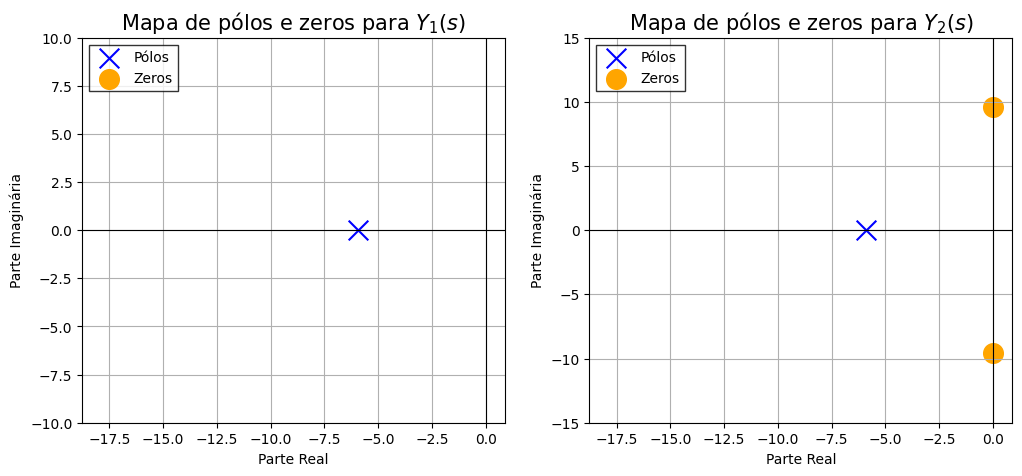

In [37]:
polos_y1 = ct.poles(G1_tf[1])
zeros_y1 = ct.zeros(G1_tf[1])

polos_y2 = ct.poles(G2_tf[1])
zeros_y2 = ct.zeros(G2_tf[1])

r_p_y1 = [z.real for z in polos_y1]
i_p_y1 = [z.imag for z in polos_y1]
r_z_y1 = [z.real for z in zeros_y1]
i_z_y1 = [z.imag for z in zeros_y1]

r_p_y2 = [z.real for z in polos_y2]
i_p_y2 = [z.imag for z in polos_y2]
r_z_y2 = [z.real for z in zeros_y2]
i_z_y2 = [z.imag for z in zeros_y2]

fig, axes = plt.subplots(1,2,figsize=(12,5))
fontsize = 10

# Crie um gráfico do plano complexo
ax = axes[0]

ax.scatter(r_p_y1, i_p_y1, color='blue', marker='x', s=200, label='Pólos')
ax.scatter(r_z_y1, i_z_y1, color='orange', marker='o', s=200, label='Zeros')

ax.axhline(0, color='black', linewidth=0.8)  # Eixo imaginário
ax.axvline(0, color='black', linewidth=0.8)  # Eixo real
ax.set_xlabel('Parte Real', fontsize=10)
ax.set_ylabel('Parte Imaginária', fontsize=10)
ax.set_title('Mapa de pólos e zeros para {}'.format(r'$Y_1(s)$'), fontsize=15)
ax.grid()
ax.legend(loc='upper left',fancybox=False,edgecolor='black')
ax.set_ylim(-10,10)
ax.tick_params(axis='both', labelsize=10)

ax = axes[1]

# plt.figure(figsize=(6, 6))
ax.scatter(r_p_y2, i_p_y2, color='blue', marker='x', s=200, label='Pólos')
ax.scatter(r_z_y2, i_z_y2, color='orange', marker='o', s=200, label='Zeros')

ax.axhline(0, color='black', linewidth=0.8)  # Eixo imaginário
ax.axvline(0, color='black', linewidth=0.8)  # Eixo real
ax.set_xlabel('Parte Real', fontsize=10)
ax.set_ylabel('Parte Imaginária', fontsize=10)
ax.set_title('Mapa de pólos e zeros para {}'.format(r'$Y_2(s)$'), fontsize=15)
ax.grid()
ax.legend(loc='upper left',fancybox=False,edgecolor='black')
ax.tick_params(axis='both', labelsize=10)
# plt.axis('equal')  # Mantenha proporções iguais nos eixos
ax.set_ylim(-15,15)
plt.show()

In [38]:
# Cálculo de Margens de Estabilidade

mg, mf, me, fcc, fcg, fme  = ct.stability_margins(G1_tf[1])

# Imprima as margens e as frequências calculadas
print(f"Margem de Ganho: {mg}")
print(f"Margem de Fase: {mf}")
print(f"Margem de Estabilidade: {me}")
print(f"Frequência de Cruzamento de Fase: {fcc}")
print(f"Frequência de Cruzamento de Ganho: {fcg}")
print(f"Frequência de Margem de Estabilidade: {fme}")

Margem de Ganho: 8.333333333333332
Margem de Fase: inf
Margem de Estabilidade: 0.8144409828959038
Frequência de Cruzamento de Fase: 29.303014634447877
Frequência de Cruzamento de Ganho: nan
Frequência de Margem de Estabilidade: 20.358584244339568


In [39]:
# Cálculo de Margens de Estabilidade

mg, mf, me, fcc, fcg, fme  = ct.stability_margins(G2_tf[1])

# Imprima as margens e as frequências calculadas
print(f"Margem de Ganho: {mg}")
print(f"Margem de Fase: {mf}")
print(f"Margem de Estabilidade: {me}")
print(f"Frequência de Cruzamento de Fase: {fcc}")
print(f"Frequência de Cruzamento de Ganho: {fcg}")
print(f"Frequência de Margem de Estabilidade: {fme}")

Margem de Ganho: inf
Margem de Fase: inf
Margem de Estabilidade: 1.0
Frequência de Cruzamento de Fase: nan
Frequência de Cruzamento de Ganho: nan
Frequência de Margem de Estabilidade: 9.591663046625435


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


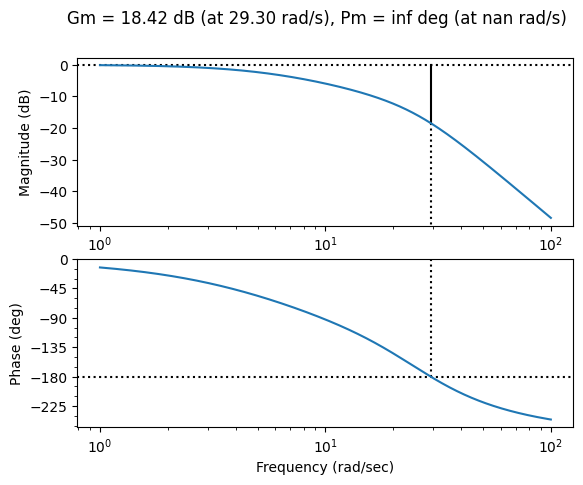

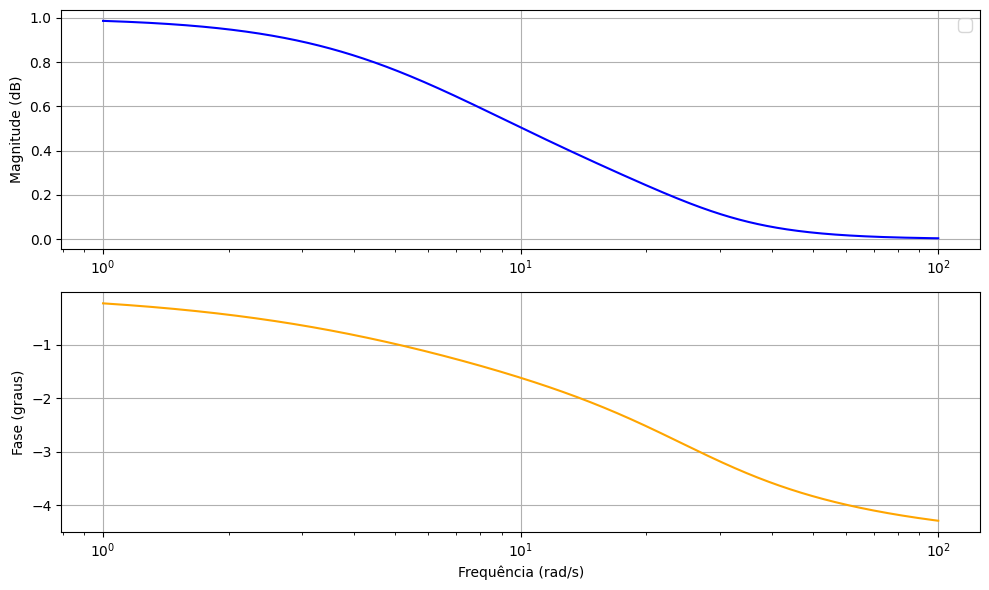

In [40]:
# Calcule a resposta em frequência
mag, phase, omega = ct.bode_plot(G1_tf[1], dB=True, deg=True, margins=True)

# Crie um gráfico Bode plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(omega, mag, color='blue')
plt.ylabel('Magnitude (dB)', fontsize=10)
plt.grid()

plt.subplot(2, 1, 2)
plt.semilogx(omega, phase, color='orange')
plt.ylabel('Fase (graus)',fontsize=10)
plt.xlabel('Frequência (rad/s)', fontsize=10)
plt.grid()
plt.tick_params(axis='both', labelsize=10)

# Adicione as margens no gráfico
plt.subplot(2, 1, 1)
# plt.axvline(x=mag[1], color='red', linestyle='dashed', label='Margem de Ganho')
# plt.axvline(x=mag[2], color='green', linestyle='dashed', label='Margem de Fase')
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=10)

# plt.title('Diagrama de Bode para {}'.format(r'$G_1(s)$'), fontsize=15)


# Ajuste o layout do gráfico
plt.tight_layout()
plt.show()

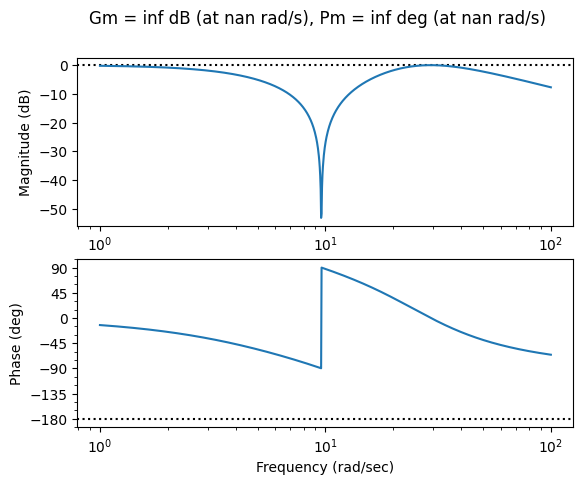

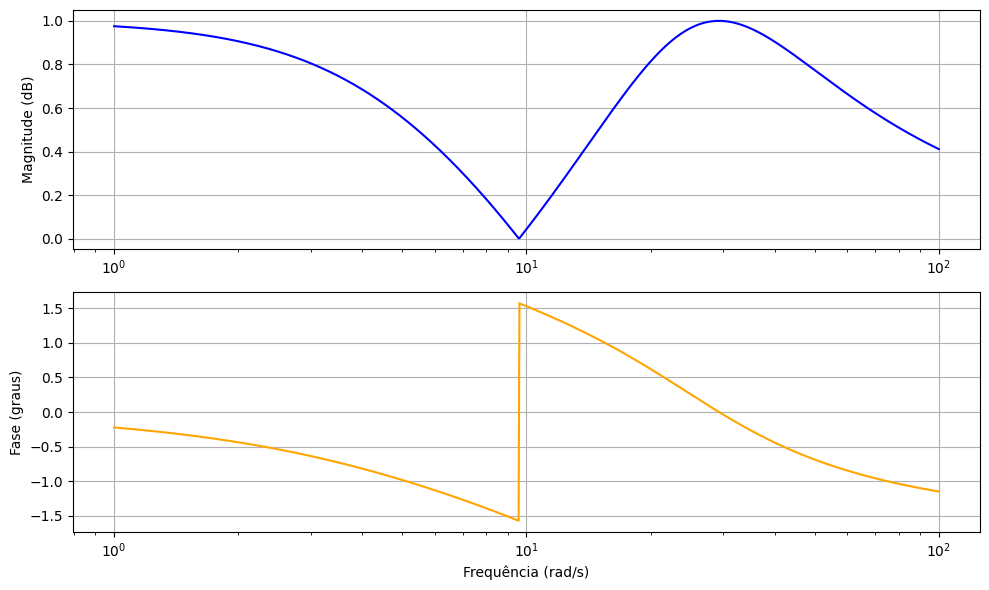

In [41]:
# Calcule a resposta em frequência
mag, phase, omega = ct.bode_plot(G2_tf[1], dB=True, deg=True, margins=True)

# Crie um gráfico Bode plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(omega, mag, color='blue')
plt.ylabel('Magnitude (dB)', fontsize=10)
plt.grid()

plt.subplot(2, 1, 2)
plt.semilogx(omega, phase, color='orange')
plt.ylabel('Fase (graus)',fontsize=10)
plt.xlabel('Frequência (rad/s)', fontsize=10)
plt.grid()
plt.tick_params(axis='both', labelsize=10)

# Adicione as margens no gráfico
plt.subplot(2, 1, 1)
# plt.axvline(x=mag[1], color='red', linestyle='dashed', label='Margem de Ganho')
# plt.axvline(x=mag[2], color='green', linestyle='dashed', label='Margem de Fase')
# plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=10)

# plt.title('Diagrama de Bode para {}'.format(r'$G_2(s)$'), fontsize=15)


# Ajuste o layout do gráfico
plt.tight_layout()
plt.show()

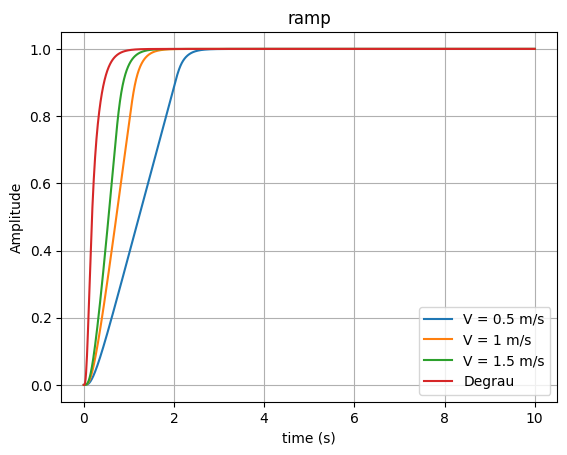

In [42]:
a1 = 0.5
a2 = 1
a3 = 1.5

f1 = (np.absolute(a1*t-1)-np.absolute(a1*t)-1)/(-2)
f2 = (np.absolute(a2*t-1)-np.absolute(a2*t)-1)/(-2)
f3 = (np.absolute(a3*t-1)-np.absolute(a3*t)-1)/(-2)

_, r1 = ct.forced_response(G1_tf[1],t,f1)
_, r2 = ct.forced_response(G1_tf[1],t,f2)
_, r3 = ct.forced_response(G1_tf[1],t,f3)
_, r4 = ct.forced_response(G1_tf[1],t,u)

plt.plot(t, r1, label='V = 0.5 m/s')
plt.plot(t, r2, label='V = 1 m/s')
plt.plot(t, r3, label='V = 1.5 m/s')
plt.plot(t, r4, label='Degrau')
plt.grid()
plt.title('ramp')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()

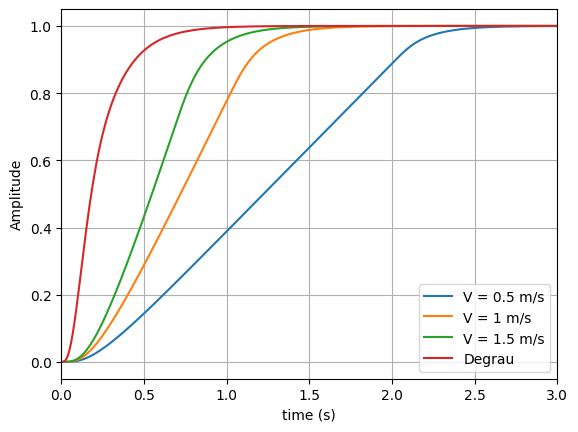

In [43]:
f1 = (np.absolute(a1*t-1)-np.absolute(a1*t)-1)/(-2)
f2 = (np.absolute(a2*t-1)-np.absolute(a2*t)-1)/(-2)
f3 = (np.absolute(a3*t-1)-np.absolute(a3*t)-1)/(-2)


_, r1 = ct.forced_response(G1_tf[1],t,f1)
_, r2 = ct.forced_response(G1_tf[1],t,f2)
_, r3 = ct.forced_response(G1_tf[1],t,f3)
_, r4 = ct.forced_response(G1_tf[1],t,u)

plt.plot(t, r1, label='V = 0.5 m/s')
plt.plot(t, r2, label='V = 1 m/s')
plt.plot(t, r3, label='V = 1.5 m/s')
plt.plot(t, r4, label='Degrau')
plt.grid()
plt.xlim(0,3)
# plt.title('Resposta de Y1(s) para uma entrada em rampa com velocidades variadas')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()

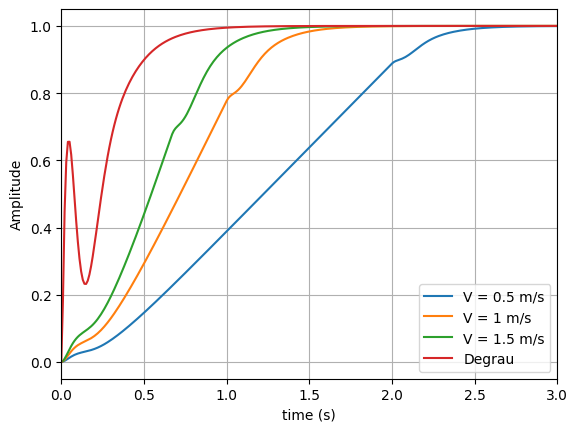

In [44]:
f1 = (np.absolute(a1*t-1)-np.absolute(a1*t)-1)/(-2)
f2 = (np.absolute(a2*t-1)-np.absolute(a2*t)-1)/(-2)
f3 = (np.absolute(a3*t-1)-np.absolute(a3*t)-1)/(-2)


_, r1 = ct.forced_response(G2_tf[1],t,f1)
_, r2 = ct.forced_response(G2_tf[1],t,f2)
_, r3 = ct.forced_response(G2_tf[1],t,f3)
_, r4 = ct.forced_response(G2_tf[1],t,u)

plt.plot(t, r1, label='V = 0.5 m/s')
plt.plot(t, r2, label='V = 1 m/s')
plt.plot(t, r3, label='V = 1.5 m/s')
plt.plot(t, r4, label='Degrau')
plt.grid()
plt.xlim(0,3)
# plt.title('Resposta de Y2(s) para uma entrada em rampa com velocidades variadas')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()

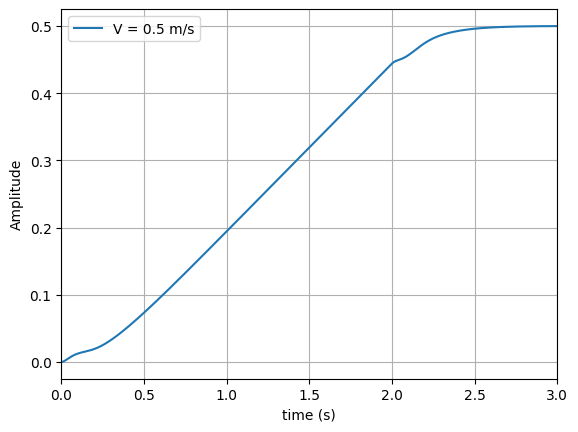

In [56]:
d = 2
theta = r1/d
theta
plt.plot(t, theta, label='V = 0.5 m/s')
# plt.plot(t, r2, label='V = 1 m/s')
# plt.plot(t, r3, label='V = 1.5 m/s')
# plt.plot(t, r4, label='Degrau')
plt.grid()
plt.xlim(0,3)
# plt.title('Resposta de Y2(s) para uma entrada em rampa com velocidades variadas')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()

In [57]:
cg = d/2
cg

1.0

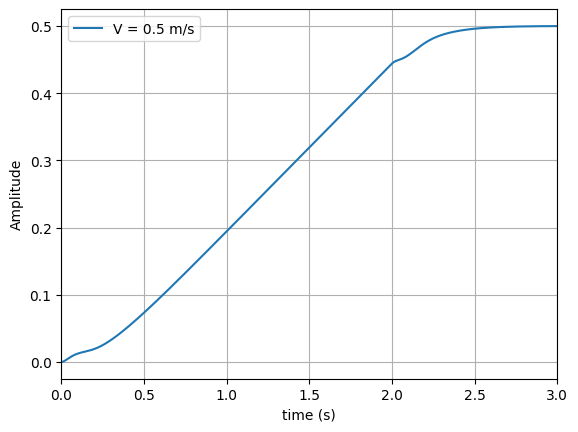

In [58]:
delta_cg = r1/2
plt.plot(t, delta_cg, label='V = 0.5 m/s')
# plt.plot(t, r2, label='V = 1 m/s')
# plt.plot(t, r3, label='V = 1.5 m/s')
# plt.plot(t, r4, label='Degrau')
plt.grid()
plt.xlim(0,3)
# plt.title('Resposta de Y2(s) para uma entrada em rampa com velocidades variadas')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()

In [70]:
alfa = (1-r1)/d
delta_cg1 = (1-r1)/2

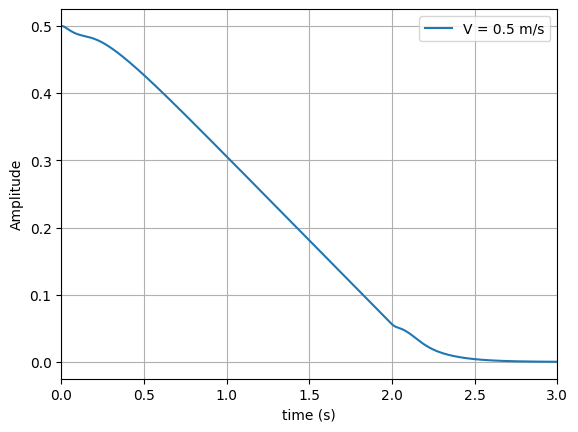

In [71]:
plt.plot(t, alfa, label='V = 0.5 m/s')
# plt.plot(t, r2, label='V = 1 m/s')
# plt.plot(t, r3, label='V = 1.5 m/s')
# plt.plot(t, r4, label='Degrau')
plt.grid()
plt.xlim(0,3)
# plt.title('Resposta de Y2(s) para uma entrada em rampa com velocidades variadas')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()

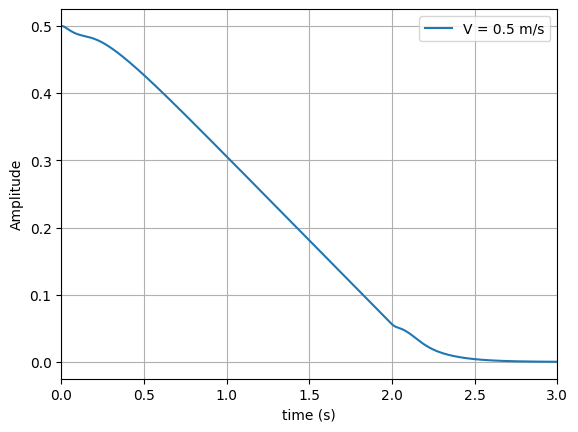

In [72]:
plt.plot(t, delta_cg1, label='V = 0.5 m/s')
# plt.plot(t, r2, label='V = 1 m/s')
# plt.plot(t, r3, label='V = 1.5 m/s')
# plt.plot(t, r4, label='Degrau')
plt.grid()
plt.xlim(0,3)
# plt.title('Resposta de Y2(s) para uma entrada em rampa com velocidades variadas')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()

In [ ]:

plt.plot(t, theta, label='V = 0.5 m/s')
# plt.plot(t, r2, label='V = 1 m/s')
# plt.plot(t, r3, label='V = 1.5 m/s')
# plt.plot(t, r4, label='Degrau')
plt.grid()
plt.xlim(0,3)
# plt.title('Resposta de Y2(s) para uma entrada em rampa com velocidades variadas')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()

In [ ]:
pol_1 = (G1 / (b3*(b2*s + k2)))**(-1)
pol_1 = factor(pol_1)
pol_1

b2*b3*s + b2*m1*s**2 + b2*m2*s**2 + b3*k2 + b3*m1*s**2 + k2*m1*s + k2*m2*s + m1*m2*s**3

In [ ]:
p1_car = m1*m2*s**3 + (b2*m1 + b2*m2 + b3*m1)*s**2 + (k2*m1 + k2*m2)*s + k2*b3
p1_car

b3*k2 + m1*m2*s**3 + s**2*(b2*m1 + b2*m2 + b3*m1) + s*(k2*m1 + k2*m2)

In [ ]:
G2

b3*(b2*s + k2 + m1*s**2)/(b2*b3*s + b2*m1*s**2 + b2*m2*s**2 + b3*k2 + b3*m1*s**2 + k2*m1*s + k2*m2*s + m1*m2*s**3)

In [ ]:
pol_2 = (G2 / (b3*(b2*s + k2 + m1*s**2)))**(-1)
pol_2 = factor(pol_2)
pol_2

b2*b3*s + b2*m1*s**2 + b2*m2*s**2 + b3*k2 + b3*m1*s**2 + k2*m1*s + k2*m2*s + m1*m2*s**3

In [ ]:
a0 = m1*m2
a1 = b2*m1 + b2*m2 + b3*m1
a2 = k2*m1 + k2*m2
a3 = b3*k2

In [ ]:
b1 = (a1*a2 - a0*a3)/a1
b1.simplify()

k2*(-b3*m1*m2 + (m1 + m2)*(b2*m1 + b2*m2 + b3*m1))/(b2*m1 + b2*m2 + b3*m1)

In [ ]:
b2 = (a1*a2 - a0*a3)/a1
b2.simplify()

k2*(-b3*m1*m2 + (m1 + m2)*(b2*m1 + b2*m2 + b3*m1))/(b2*m1 + b2*m2 + b3*m1)